# 농촌진흥청 9차 개정 식품성분표에 관한 처리 코드|
### CODE : DREAMWALKER

1. 식품코드를 통한 식품군 추가

In [212]:
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Enable Korean Font

In [92]:
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

In [15]:
df = pd.read_excel('../data/food_base_result.xlsx',index_col= 0)

In [16]:
df.head()

,식품코드,식품명,에너지,수분,단백질,지질,회분,탄수 화물,총 당류,총 식이섬유,...,비타민 B1,비타민 B2,니아신,판토텐산,비타민 B6,비오틴,엽산 (DFE),비타민 B12,비타민 C,source
색인,,,,,,,,,,,,,,,,,,,,,
1,A001001A010a,"귀리, 겉귀리, 도정, 생것",332,9.4,11.4,3.7,2,73.5,-,-,...,0.13,0.21,2.3,-,-,-,-,-,0,농진청('93)
2,A001002A010a,"귀리, 쌀귀리, 도정, 생것",334,9.7,14.3,3.8,1.8,70.4,-,-,...,0.15,0.46,2.2,-,-,-,-,-,0,농진청('93)
3,A0020000009a,"귀리, 오트밀",348,12,13.2,8.2,1.7,64.9,-,18.8,...,-,0.07,1.1,-,-,-,-,-,tr,농진청('11)
4,A003000A010a,"기장, 도정, 생것",360,11.3,11.2,1.9,1,74.6,-,-,...,0.42,0.09,2.9,-,-,-,-,-,0,농진청('06)
5,A003001A010a,"기장, 찰기장, 도정, 생것",365,11.3,12.46,3.09,1.24,71.91,0,4.6,...,0.417,0.078,2.213,0,0.009,0,26,0,0,농진청('13)


In [17]:
df.tail()

,식품코드,식품명,에너지,수분,단백질,지질,회분,탄수 화물,총 당류,총 식이섬유,...,비타민 B1,비타민 B2,니아신,판토텐산,비타민 B6,비오틴,엽산 (DFE),비타민 B12,비타민 C,source
색인,,,,,,,,,,,,,,,,,,,,,
2996,T0250010009a,"팽창제, 베이킹파우더",51,4,0.1,0,71.8,24.1,0,0.2,...,0,0,0,0,0,-,0,0,0,USDA('15)
2997,T0250030001a,"팽창제, 효모, 말린것",313,8.7,37.1,6.8,4.3,43.1,0.1,32.6,...,8.81,3.72,22.0,5.73,1.28,309.7,3800,0,1,JAPAN('15)
2998,T0260000009a,프로폴리스,642,2.1,0.5,50.3,0.2,46.9,-,-,...,0.14,0.83,1.7,-,-,-,-,-,90,농진청('05)
2999,T0290002601a,"흰점박이 꽃무지, 유충, 말린것",463,1.6,54.13,18.52,5.76,19.99,0.18,19.1,...,0.608,2.096,3.97,0.806,0,0,256,88.22,0,농진청('15)
3000,T0290002600a,"흰점박이 꽃무지, 유충, 생것",122,74.7,15.78,5.2,1.42,2.9,0,1.4,...,0.038,0.407,1.619,0.46,0,0,43,22.24,0,농진청('15)


In [21]:
food_code = df['식품코드'].tolist()

In [22]:
type(food_code)

list

In [24]:
food_code[0]

'A001001A010a'

## 딕셔너리를 사용해 식품군 분류를 진행

In [46]:
food_dic = { 'A' : '곡류', 'B':'감자류 및 전분류', 'C':'당류', 'D':'두류', 'E':'견과류 및 종실류',
            'F': '채소류', 'G':'버섯류', 'H':'과일류','I':'육류', 'J':'난류', 'K':'어류',
            'L':'패류', 'M':'어류기타', 'N':'해조류','O' : '우유 및 유제품류','P': '유지류',
            'Q': '차류','R': '음료류','S': '주류','T': '조미료류','U': '조리가공식품류','V': '기타'}

In [47]:
food_dic.get(0)

In [51]:
food_group = []
for i, code in enumerate(food_code):
    if food_dic[code[0]]:
        food_group.append(food_dic[code[0]])
        #print(i, food_dic[code[0]])

In [53]:
df['식품군'] = food_group

## 처리결과 확인

In [54]:
df.head()

,식품코드,식품명,에너지,수분,단백질,지질,회분,탄수 화물,총 당류,총 식이섬유,...,비타민 B2,니아신,판토텐산,비타민 B6,비오틴,엽산 (DFE),비타민 B12,비타민 C,source,식품군
색인,,,,,,,,,,,,,,,,,,,,,
1,A001001A010a,"귀리, 겉귀리, 도정, 생것",332,9.4,11.4,3.7,2,73.5,-,-,...,0.21,2.3,-,-,-,-,-,0,농진청('93),곡류
2,A001002A010a,"귀리, 쌀귀리, 도정, 생것",334,9.7,14.3,3.8,1.8,70.4,-,-,...,0.46,2.2,-,-,-,-,-,0,농진청('93),곡류
3,A0020000009a,"귀리, 오트밀",348,12,13.2,8.2,1.7,64.9,-,18.8,...,0.07,1.1,-,-,-,-,-,tr,농진청('11),곡류
4,A003000A010a,"기장, 도정, 생것",360,11.3,11.2,1.9,1,74.6,-,-,...,0.09,2.9,-,-,-,-,-,0,농진청('06),곡류
5,A003001A010a,"기장, 찰기장, 도정, 생것",365,11.3,12.46,3.09,1.24,71.91,0,4.6,...,0.078,2.213,0,0.009,0,26,0,0,농진청('13),곡류


## 식품군의 개수를 표기한다.

In [114]:
food_group_count = df.groupby(df['식품군']).size()

In [115]:
type(food_group_count)

pandas.core.series.Series

In [116]:
food_group_count.dtypes

dtype('int64')

In [117]:
food_group_count = food_group_count.sort_values()

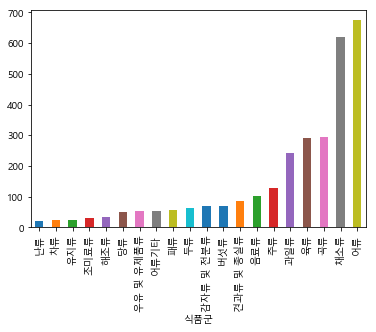

In [118]:
food_group_count.plot.bar()

In [119]:
food_group_count = pd.DataFrame(food_group_count, columns=['식품군'])

In [120]:
food_group_count

,식품군
식품군,
난류,22
차류,25
유지류,25
조미료류,30
해조류,34
당류,50
우유 및 유제품류,54
어류기타,55
패류,57


### Save food_group_count to Excel

In [121]:
food_group_count.to_excel('../output/group_count.xlsx')

In [84]:
df.count()

식품코드         3000
식품명          3000
에너지          3000
수분           3000
단백질          3000
지질           3000
회분           3000
탄수\n화물       3000
총 당류         3000
총 \n식이섬유     3000
총            3000
필수           3000
비필수          3000
총            3000
총 필수         3000
총 포화         3000
총 단일\n불포화    3000
총 다중\n불포화    3000
스테롤          3000
상당량          3000
ref          3000
칼슘           3000
철            3000
마그네슘         3000
인            3000
칼륨           3000
나트륨          3000
아연           3000
구리           3000
망간           3000
셀레늄          3000
몰리브덴         3000
요오드          3000
레티놀          3000
베타카로틴        3000
비타민 D        3000
비타민 E        3000
비타민 K1       3000
비타민 B1       3000
비타민 B2       3000
니아신          3000
판토텐산         3000
비타민 B6       3000
비오틴          3000
엽산\n(DFE)    3000
비타민 B12      3000
비타민 C        3000
source       3000
식품군          3000
dtype: int64

In [83]:
df.describe()

,식품코드,식품명,에너지,수분,단백질,지질,회분,탄수 화물,총 당류,총 식이섬유,...,비타민 B2,니아신,판토텐산,비타민 B6,비오틴,엽산 (DFE),비타민 B12,비타민 C,source,식품군
count,3000,3000,3000,3000,3000,3000.0,3000.0,3000,3000,3000,...,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
unique,3000,3000,527,990,1086,788.0,546.0,1389,614,227,...,568,990,645,250,345,233,289,645,63,20
top,I008000B019j,"닭 부산물, 심장, 삶은것",15,0,0,0.1,1.3,0,-,-,...,-,-,-,-,-,-,-,0,수('09),어류
freq,1,1,31,16,70,203.0,132.0,312,1790,1315,...,136,209,1572,1548,1978,1548,1544,988,394,674


In [55]:
df.columns

Index(['식품코드', '식품명', '에너지', '수분', '단백질', '지질', '회분', '탄수\n화물', '총 당류',
       '총 \n식이섬유', '총 ', '필수 ', '비필수 ', '총', '총 필수', '총 포화 ', '총 단일\n불포화',
       '총 다중\n불포화', '스테롤', '상당량', 'ref', '칼슘', '철', '마그네슘', '인', '칼륨', '나트륨',
       '아연', '구리', '망간', '셀레늄', '몰리브덴', '요오드', '레티놀', '베타카로틴', '비타민 D',
       '비타민 E', '비타민 K1', '비타민 B1', '비타민 B2', '니아신', '판토텐산', '비타민 B6', '비오틴',
       '엽산\n(DFE)', '비타민 B12', '비타민 C', 'source', '식품군'],
      dtype='object')

In [70]:
df.columns.tolist()

['식품코드',
 '식품명',
 '에너지',
 '수분',
 '단백질',
 '지질',
 '회분',
 '탄수\n화물',
 '총 당류',
 '총 \n식이섬유',
 '총 ',
 '필수 ',
 '비필수 ',
 '총',
 '총 필수',
 '총 포화 ',
 '총 단일\n불포화',
 '총 다중\n불포화',
 '스테롤',
 '상당량',
 'ref',
 '칼슘',
 '철',
 '마그네슘',
 '인',
 '칼륨',
 '나트륨',
 '아연',
 '구리',
 '망간',
 '셀레늄',
 '몰리브덴',
 '요오드',
 '레티놀',
 '베타카로틴',
 '비타민 D',
 '비타민 E',
 '비타민 K1',
 '비타민 B1',
 '비타민 B2',
 '니아신',
 '판토텐산',
 '비타민 B6',
 '비오틴',
 '엽산\n(DFE)',
 '비타민 B12',
 '비타민 C',
 'source',
 '식품군']

## 필요한 데이터만을 가져온다

In [58]:
result = df[['식품코드','식품군','식품명','에너지','탄수\n화물','단백질','지질']]

In [59]:
result.head()

,식품코드,식품군,식품명,에너지,탄수 화물,단백질,지질
색인,,,,,,,
1,A001001A010a,곡류,"귀리, 겉귀리, 도정, 생것",332,73.5,11.4,3.7
2,A001002A010a,곡류,"귀리, 쌀귀리, 도정, 생것",334,70.4,14.3,3.8
3,A0020000009a,곡류,"귀리, 오트밀",348,64.9,13.2,8.2
4,A003000A010a,곡류,"기장, 도정, 생것",360,74.6,11.2,1.9
5,A003001A010a,곡류,"기장, 찰기장, 도정, 생것",365,71.91,12.46,3.09


In [61]:
import os

In [62]:
dir_name = '../output/'

In [66]:
if not os.path.isdir(dir_name):
    os.mkdir('../output/')
else : 
    result.to_excel('../output/result_01.xlsx')

# 식품 안전나라의 데이터베이스를 가져온다

In [123]:
food_safe = pd.read_excel('../data/food_safe_delete_duplicated.xlsx')

In [124]:
food_safe.head()

,번호,식품군,식품이름,1회제공량 (g),열량 (kcal),탄수화물 (g),단백질 (g),지방 (g),당류 (g),나트륨 (mg),콜레스테롤 (mg),포화지방산 (g),트랜스지방산 (g),년도
0,1,곡류 및 그 제품,"고량미,고량미, 알곡",100,349.0,67.80,10.10,3.70,0.0,NaN,0.0,0.0,0,2001
1,2,곡류 및 그 제품,"과자,스넥과자, 유아용과자",30,129.9,20.13,3.54,3.96,0.0,57.6,0.0,0.0,0,2006
2,4,곡류 및 그 제품,"귀리 가공(기타), 오트밀",100,348.0,64.90,13.20,8.20,NaN,4.0,NaN,NaN,0,2017
3,6,곡류 및 그 제품,"귀리(겉귀리), 도정곡, 생것",100,332.0,73.50,11.40,3.70,NaN,2.0,NaN,NaN,0,2017
4,8,곡류 및 그 제품,"귀리(쌀귀리), 도정곡, 생것",100,334.0,70.40,14.30,3.80,NaN,3.0,NaN,NaN,0,2017


### 식품군을 계수한다.

In [133]:
food_safe_group = food_safe.groupby(food_safe['식품군']).size()

### food_safe_group의 자료를 Dataframe으로 변경

In [134]:
food_safe_group = pd.DataFrame(food_safe_group, columns=['식품군'])

In [147]:
food_safe_group.sort_values(['식품군'])

c:\users\2e313jcp\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '식품군' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  """Entry point for launching an IPython kernel.


,식품군
식품군,
난류,19
유지류,26
기타,37
우유 및 유제품,40
감자 및 전분류,43
두류 및 그 제품,46
버섯류,56
당류 및 그 제품,58
해조류,61


In [149]:
merge_food_group = pd.merge(food_group_count, food_safe_group, how='outer', left_index=True, right_index=True)

In [150]:
merge_food_group.columns = ['농촌진흥청','식품안전나라']

In [151]:
merge_food_group.head()

,농촌진흥청,식품안전나라
식품군,,
감자 및 전분류,NaN,43.0
감자류 및 전분류,69.0,NaN
견과류,NaN,70.0
견과류 및 종실류,86.0,NaN
곡류,296.0,NaN


In [152]:
merge_food_group.to_excel('../output/merge_food_group.xlsx')

## 1회 제공량이 없네 ..

In [159]:
gokryu = []
for i,data in enumerate(result['식품군']):
    if data =='곡류':
        gokryu.append(result.iloc[i])

In [161]:
gokryu_frame = pd.DataFrame(gokryu)

In [162]:
gokryu_frame.head()

,식품코드,식품군,식품명,에너지,탄수 화물,단백질,지질
1,A001001A010a,곡류,"귀리, 겉귀리, 도정, 생것",332,73.5,11.4,3.7
2,A001002A010a,곡류,"귀리, 쌀귀리, 도정, 생것",334,70.4,14.3,3.8
3,A0020000009a,곡류,"귀리, 오트밀",348,64.9,13.2,8.2
4,A003000A010a,곡류,"기장, 도정, 생것",360,74.6,11.2,1.9
5,A003001A010a,곡류,"기장, 찰기장, 도정, 생것",365,71.91,12.46,3.09


In [163]:
gokryu_frame.shape

(296, 7)

In [164]:
gokryu_frame.columns = ['code', 'group', 'name', 'kcal', 'carbohydrate','protein', 'fat']

In [165]:
gokryu_frame.head()

,code,group,name,kcal,carbohydrate,protein,fat
1,A001001A010a,곡류,"귀리, 겉귀리, 도정, 생것",332,73.5,11.4,3.7
2,A001002A010a,곡류,"귀리, 쌀귀리, 도정, 생것",334,70.4,14.3,3.8
3,A0020000009a,곡류,"귀리, 오트밀",348,64.9,13.2,8.2
4,A003000A010a,곡류,"기장, 도정, 생것",360,74.6,11.2,1.9
5,A003001A010a,곡류,"기장, 찰기장, 도정, 생것",365,71.91,12.46,3.09


In [176]:
gokryu_frame.to_excel('../output/only_gokryu_frist.xlsx')

In [177]:
gokryu_frame = pd.read_excel('../output/only_gokryu_frist.xlsx')

In [179]:
kcal = gokryu_frame['kcal']
carbohydrate = gokryu_frame['carbohydrate']
protein = gokryu_frame['protein']
fatt = gokryu_frame['fat']

- kcal : origin_value = 100 : x

\\( x(t)=\frac{-b\pm \sqrt{{b}^{2}-4ac}}{2a} \\)


1. \\( kcal : originvalue = 100 : x \\)

2. \\( originvalue * 100 =  x * kcal \\)

3. \\( x = \frac{ originValue * 100} {kcal} \\)


In [180]:
kcal = kcal.astype('float')
carbohydrate = carbohydrate.astype('float')
protein = protein.astype('float')
fatt = fatt.astype('float')

In [181]:
carbohydrate.dtypes

dtype('float64')

In [183]:
fix_carbohydrate = (carbohydrate * 100) / kcal
fix_protein = (protein * 100) / kcal
fix_fatt = (fatt * 100) / kcal

In [184]:
gokryu_frame['kcal'] = 100
gokryu_frame['carbohydrate'] = fix_carbohydrate
gokryu_frame['protein'] = fix_protein
gokryu_frame['fat'] = fix_fatt

In [185]:
gokryu_frame.head()

,code,group,name,kcal,carbohydrate,protein,fat
1,A001001A010a,곡류,"귀리, 겉귀리, 도정, 생것",100,22.138554,3.433735,1.114458
2,A001002A010a,곡류,"귀리, 쌀귀리, 도정, 생것",100,21.077844,4.281437,1.137725
3,A0020000009a,곡류,"귀리, 오트밀",100,18.649425,3.793103,2.356322
4,A003000A010a,곡류,"기장, 도정, 생것",100,20.722222,3.111111,0.527778
5,A003001A010a,곡류,"기장, 찰기장, 도정, 생것",100,19.701370,3.413699,0.846575


In [233]:
gokryu_frame.to_excel('../output/only_gokryu_frist_fix100.xlsx')

In [245]:
error_rate = 0.2
gok_rate = 2 / 23
high_rate = gok_rate + (gok_rate * error_rate)
low_rate = gok_rate - (gok_rate * error_rate)

In [246]:
rate = gokryu_frame['protein'] / gokryu_frame['carbohydrate']

In [247]:
type(rate)

pandas.core.series.Series

In [248]:
rate = rate.tolist()

In [249]:
survived = []
for i,x in enumerate(rate):
#     print(i,x)
    if low_rate <= x <= high_rate:
        survived.append(1)
    else:
        survived.append(0)

In [250]:
gokryu_frame['survived'] = survived

In [251]:
gokryu_frame.head()

,code,group,name,kcal,carbohydrate,protein,fat,survived
1,A001001A010a,곡류,"귀리, 겉귀리, 도정, 생것",100,22.138554,3.433735,1.114458,0
2,A001002A010a,곡류,"귀리, 쌀귀리, 도정, 생것",100,21.077844,4.281437,1.137725,0
3,A0020000009a,곡류,"귀리, 오트밀",100,18.649425,3.793103,2.356322,0
4,A003000A010a,곡류,"기장, 도정, 생것",100,20.722222,3.111111,0.527778,0
5,A003001A010a,곡류,"기장, 찰기장, 도정, 생것",100,19.701370,3.413699,0.846575,0


In [252]:
gokryu_frame.describe()

,kcal,carbohydrate,protein,fat,survived
count,296.0,296.000000,296.000000,294.000000,296.000000
mean,100.0,20.162606,2.412147,1.446806,0.300676
std,0.0,4.295891,0.922045,1.723671,0.459328
min,100.0,8.706949,0.476886,0.000000,0.000000
25%,100.0,18.680819,1.731882,0.305092,0.000000
50%,100.0,21.100799,2.288809,0.645294,0.000000
75%,100.0,22.909518,2.988649,1.651193,1.000000
max,100.0,32.064777,6.111111,6.742857,1.000000


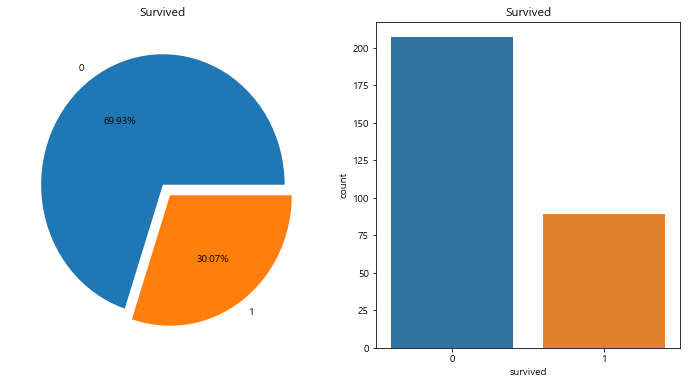

In [253]:
f,ax=plt.subplots(1,2,figsize=(12,6))

gokryu_frame['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('survived',data=gokryu_frame,ax=ax[1])
ax[1].set_title('Survived')
plt.show()